# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rikin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
load_dotenv('keys.env')
newsapi_key= os.getenv("NEWS_API_KEY")

In [11]:
# Create a newsapi client
newsapi = NewsApiClient(newsapi_key)

In [47]:
## Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin")['articles']


In [48]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="Ethereum")['articles']

In [49]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_articles:
    text=article["content"]
    sentiment=analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
    })

bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_sentiments_df

,text,compound,positive,negative,neutral
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.000,0.718
1,El Salvador has become the first country in th...,0.1280,0.043,0.000,0.957
2,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.000,1.000
3,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.000,0.925
4,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831
5,That love affair between Elon Musk and Bitcoin...,0.7322,0.162,0.000,0.838
6,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
7,Now isn't the greatest time to be a cryptocurr...,-0.7627,0.000,0.180,0.820
8,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.000,0.940
9,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.000,0.893


In [50]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_articles:
    text=article["content"]
    sentiment=analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
    })

ethereum_sentiments_df = pd.DataFrame(ethereum_sentiments)
ethereum_sentiments_df

,text,compound,positive,negative,neutral
0,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917
1,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
2,,0.0000,0.000,0.000,0.000
3,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932
4,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000
5,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.132,0.801
6,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.000,1.000
7,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934
8,Ethereum will reduce its energy consumption by...,0.2732,0.068,0.000,0.932
9,This new mining feature is called 'Norton Cryp...,0.0000,0.000,0.000,1.000


In [53]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.102645,0.067350,0.040300,0.892300
std,0.508532,0.080911,0.055214,0.074962
min,-0.762700,0.000000,0.000000,0.718000
25%,-0.315000,0.000000,0.000000,0.844000
50%,0.064000,0.051500,0.000000,0.896500
75%,0.560725,0.118750,0.089250,0.938500
max,0.840200,0.282000,0.180000,1.000000


In [54]:
# Describe the Ethereum Sentiment
ethereum_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.072755,0.037300,0.050600,0.86210
std,0.369890,0.049985,0.077435,0.21879
min,-0.868900,0.000000,0.000000,0.00000
25%,-0.345300,0.000000,0.000000,0.83825
50%,0.000000,0.000000,0.000000,0.92600
75%,0.146575,0.067000,0.081750,0.96175
max,0.670500,0.188000,0.286000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [60]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary


In [62]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    # Lemmatize words into root words
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [74]:
# Create a new tokens column for Bitcoin
bitcoin_sentiments_df["tokens"] = [tokenizer(text) for text in bitcoin_sentiments_df["text"]]
bitcoin_sentiments_df.head(3)

,text,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,"[illustration, alex, castro, verge, cryptocurr..."


In [76]:
# Create a new tokens column for Ethereum
ethereum_sentiments_df["tokens"] = [tokenizer(text) for text in ethereum_sentiments_df["text"]]
ethereum_sentiments_df.head(3)

,text,compound,positive,negative,neutral,tokens
0,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917,"[solana, isnt, known, yet, outside, crypto, co..."
1,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
2,,0.0000,0.000,0.000,0.000,[]


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [77]:
from collections import Counter
from nltk import ngrams

In [97]:
# Generate the Bitcoin N-grams where N=2
bitcoin_corpus = []
for sent in bitcoin_sentiments_df['tokens']:
    for word in sent:
        bitcoin_corpus.append(word)

bitcoin_bigram_counts = Counter(ngrams(bitcoin_corpus, n=2))
dict(bitcoin_bigram_counts.most_common(20))

{('president', 'nayib'): 2,
 ('nayib', 'bukele'): 2,
 ('bitcoin', 'legal'): 2,
 ('salvador', 'ha'): 2,
 ('ha', 'become'): 2,
 ('become', 'first'): 2,
 ('first', 'country'): 2,
 ('country', 'world'): 2,
 ('cryptocurrency', 'exchange'): 2,
 ('outage', 'morning'): 2,
 ('elon', 'musk'): 2,
 ('char', 'hello'): 2,
 ('hello', 'friend'): 2,
 ('friend', 'welcome'): 2,
 ('welcome', 'back'): 2,
 ('back', 'week'): 2,
 ('week', 'reviewlast'): 2,
 ('reviewlast', 'week'): 2,
 ('week', 'wrote'): 2,
 ('week', 'im'): 2}

In [98]:
# Generate the Ethereum N-grams where N=2
ethereum_corpus = []
for sent in ethereum_sentiments_df['tokens']:
    for word in sent:
        ethereum_corpus.append(word)

ethereum_bigram_counts = Counter(ngrams(ethereum_corpus, n=2))
dict(ethereum_bigram_counts.most_common(20))

{('char', 'bitcoin'): 2,
 ('bitcoin', 'ethereum'): 2,
 ('char', 'ethereum'): 2,
 ('virtual', 'currency'): 2,
 ('illustration', 'taken'): 2,
 ('char', 'article'): 2,
 ('article', 'wa'): 2,
 ('wa', 'translated'): 2,
 ('translated', 'spanish'): 2,
 ('spanish', 'edition'): 2,
 ('edition', 'using'): 2,
 ('using', 'ai'): 2,
 ('ai', 'technology'): 2,
 ('technology', 'errors'): 2,
 ('errors', 'may'): 2,
 ('may', 'exist'): 2,
 ('exist', 'due'): 2,
 ('norton', 'crypto'): 2,
 ('nonfungible', 'token'): 2,
 ('solana', 'isnt'): 1}

In [99]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [100]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_corpus)

[('char', 20),
 ('bitcoin', 13),
 ('crypto', 9),
 ('cryptocurrency', 8),
 ('week', 8),
 ('ha', 6),
 ('us', 6),
 ('country', 4),
 ('exchange', 4),
 ('coinbase', 4)]

In [101]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_corpus)

[('char', 19),
 ('ethereum', 7),
 ('crypto', 4),
 ('bitcoin', 4),
 ('cryptocurrency', 4),
 ('may', 4),
 ('world', 4),
 ('blockchain', 3),
 ('market', 3),
 ('new', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

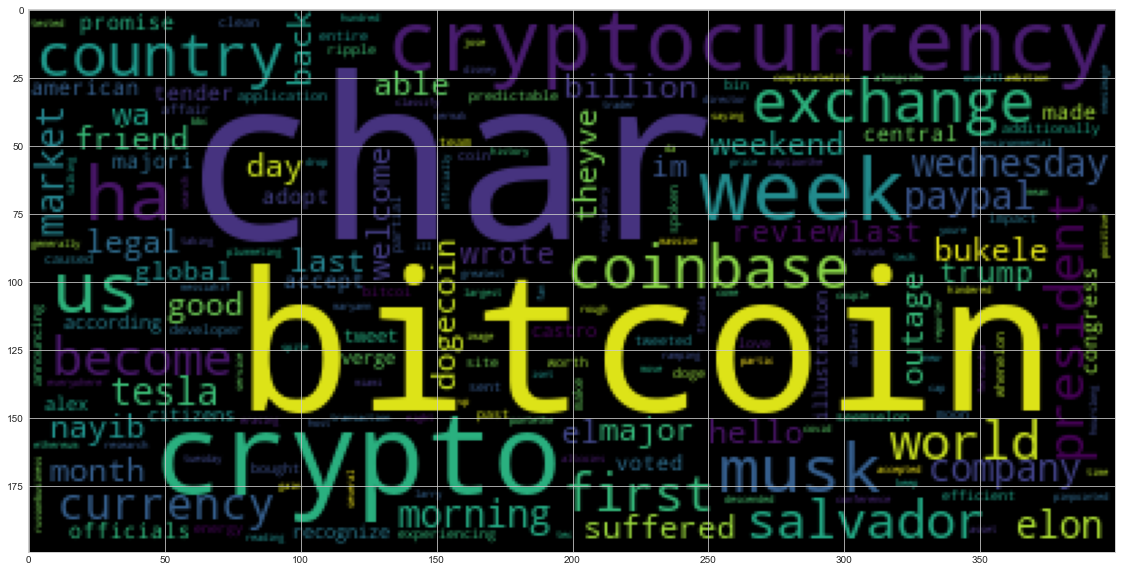

In [110]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoin_corpus)
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

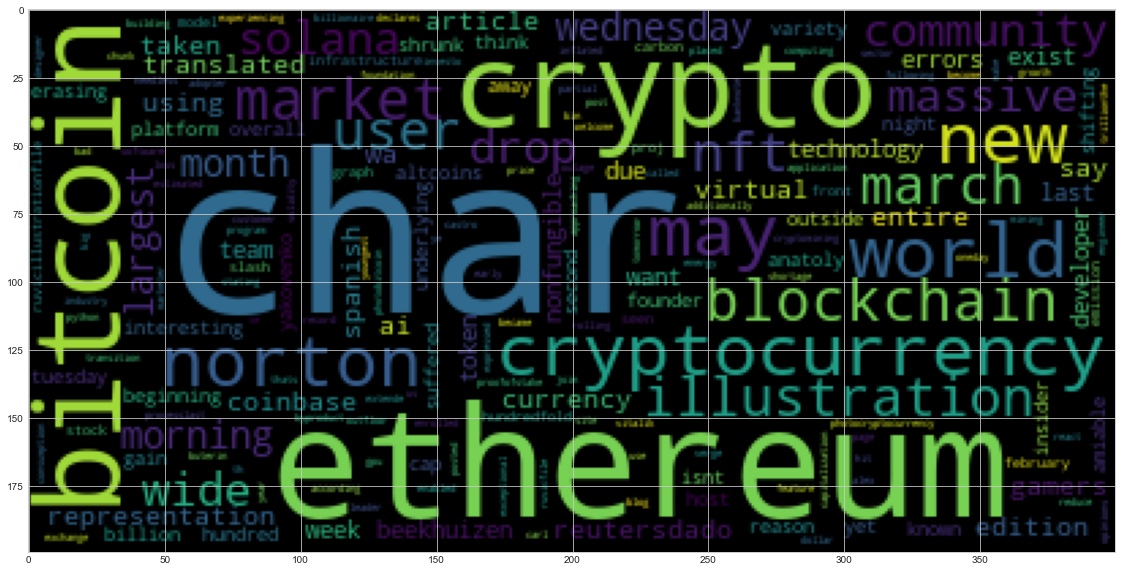

In [111]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_corpus)
wc = WordCloud().generate(ethereum_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [112]:
import spacy
from spacy import displacy

In [113]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [114]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [118]:
# Concatenate all of the Bitcoin text together
bitcoin_string

'el salvadors president nayib bukele ha made good promise adopt bitcoin legal tender officials central american country congress voted accept cryptocurrency majori char el salvador ha become first country world recognize cryptocurrency bitcoin legal currency according president nayib bukele tweet wednesday citizens able char illustration alex castro verge cryptocurrency exchange coinbase experiencing partial outage morning entire site application additionally coinbase bin char last week whenelon musk tweeted spoken team doge developer make coin efficient impact wa predictable sent dogecoin moon wa char clean energy seemselon musk tesla caused ripple cryptocurrency market past month first announcing tesla bought billion worth bitcoi char love affair elon musk bitcoin become complicatedits rough couple day crypto world price major crypto asset plummeting bitcoin partic char bitcoin ethereum host altcoins suffered massive drop tuesday night wednesday morning erasing month gain hundred bil

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_string)
# Add a title to the document


In [119]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [120]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

american NORP
first ORDINAL
wednesday DATE
morning TIME
bin PERSON
last week DATE
past month first DATE
billion CARDINAL
couple day DATE
tuesday night TIME
wednesday morning TIME
hundred billion CARDINAL
morning TIME
first ORDINAL
last weekend DATE
week reviewlast week DATE
wednesday DATE
week reviewlast week DATE
week DATE
char year DATE
monday DATE
weekend DATE


---

### Ethereum NER

In [121]:
# Concatenate all of the Ethereum text together
ethereum_string

'solana isnt known yet outside crypto community insider think blockchain platform interesting wide variety reason beginning amiable founder anatoly yakovenko char bitcoin ethereum host altcoins suffered massive drop tuesday night wednesday morning erasing month gain hundred billion market cap overall crypto market shrunk char ethereum second largest cryptocurrency bitcoin month away shifting underlying infrastructure new model would slash carbon emission hundredfold proj char representation virtual currency ethereum seen front stock graph illustration taken february reutersdado ruvicillustrationfile photocryptocurrency ethereum extende char gpu shortage inflated price become byproduct growth cryptomining needless say thats bad news gamers make big chunk computing industry customer char illustration alex castro verge cryptocurrency exchange coinbase experiencing partial outage morning entire site application additionally coinbase bin char article wa translated spanish edition using ai t

In [122]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_string)
# Add a title to the document
# YOUR CODE HERE!

In [123]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [124]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

tuesday night TIME
wednesday morning TIME
hundred billion CARDINAL
second ORDINAL
month DATE
morning TIME
bin PERSON
tomorrow DATE
last week DATE
oneday DATE
march last year DATE
wednesday DATE
one million CARDINAL
live decade DATE
week DATE


---